ToDO:
* Loop through and run stat tests

In [1]:
# imports

#standard
import pandas as pd
import random
from datetime import datetime
from pandasql import sqldf

from scipy import stats

pysqldf = lambda q: sqldf(q,globals())

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
#Custom Functions 

def d6():
    #Return a random integer between [1-6]    
    return(random.randint(1,6))

def roll_four_drop_lowest():
    single_stat_list = []
    for x in range(0,4):
        roll = d6()
        single_stat_list.append(roll)
    single_stat_list.sort()
    single_stat_list = single_stat_list[1:4] #Removes the lowest
    return(sum(single_stat_list))

def colville_calculation():
    stat_list = []
    
    while True:
        stat_list = [roll_four_drop_lowest() for i in range(6)]
        
        # Count how many stats are 15 or higher
        high_stats = [stat for stat in stat_list if stat >= 15]
        
        if len(high_stats) >= 2:
            break  # Breaks loop if at least 2 stats are >= 15
    
    return stat_list

def mercer_calculation():
    stat_list = []
    
    while True:
        stat_list = [roll_four_drop_lowest() for i in range(6)]
        
        # Only 
        if sum(stat_list) >= 70:
            break  # Breaks loop if stat total isn't about 70
    
    return stat_list

In [3]:
dnd_stats = ['strength', 
             'dexterity',
             'constitution', 
             'intelligence', 
             'wisdom', 
             'charisma']

In [4]:
stat_generation_results = []

for i in range(10000):
    colville_row = ['colville'] + colville_calculation()
    stat_generation_results.append(colville_row)
    
    mercer_row = ['mercer'] + mercer_calculation()
    stat_generation_results.append(mercer_row)

stats_df = pd.DataFrame(stat_generation_results, columns = ['source']+ dnd_stats)
stats_df['total'] = stats_df[dnd_stats].sum(axis=1)


# Testing

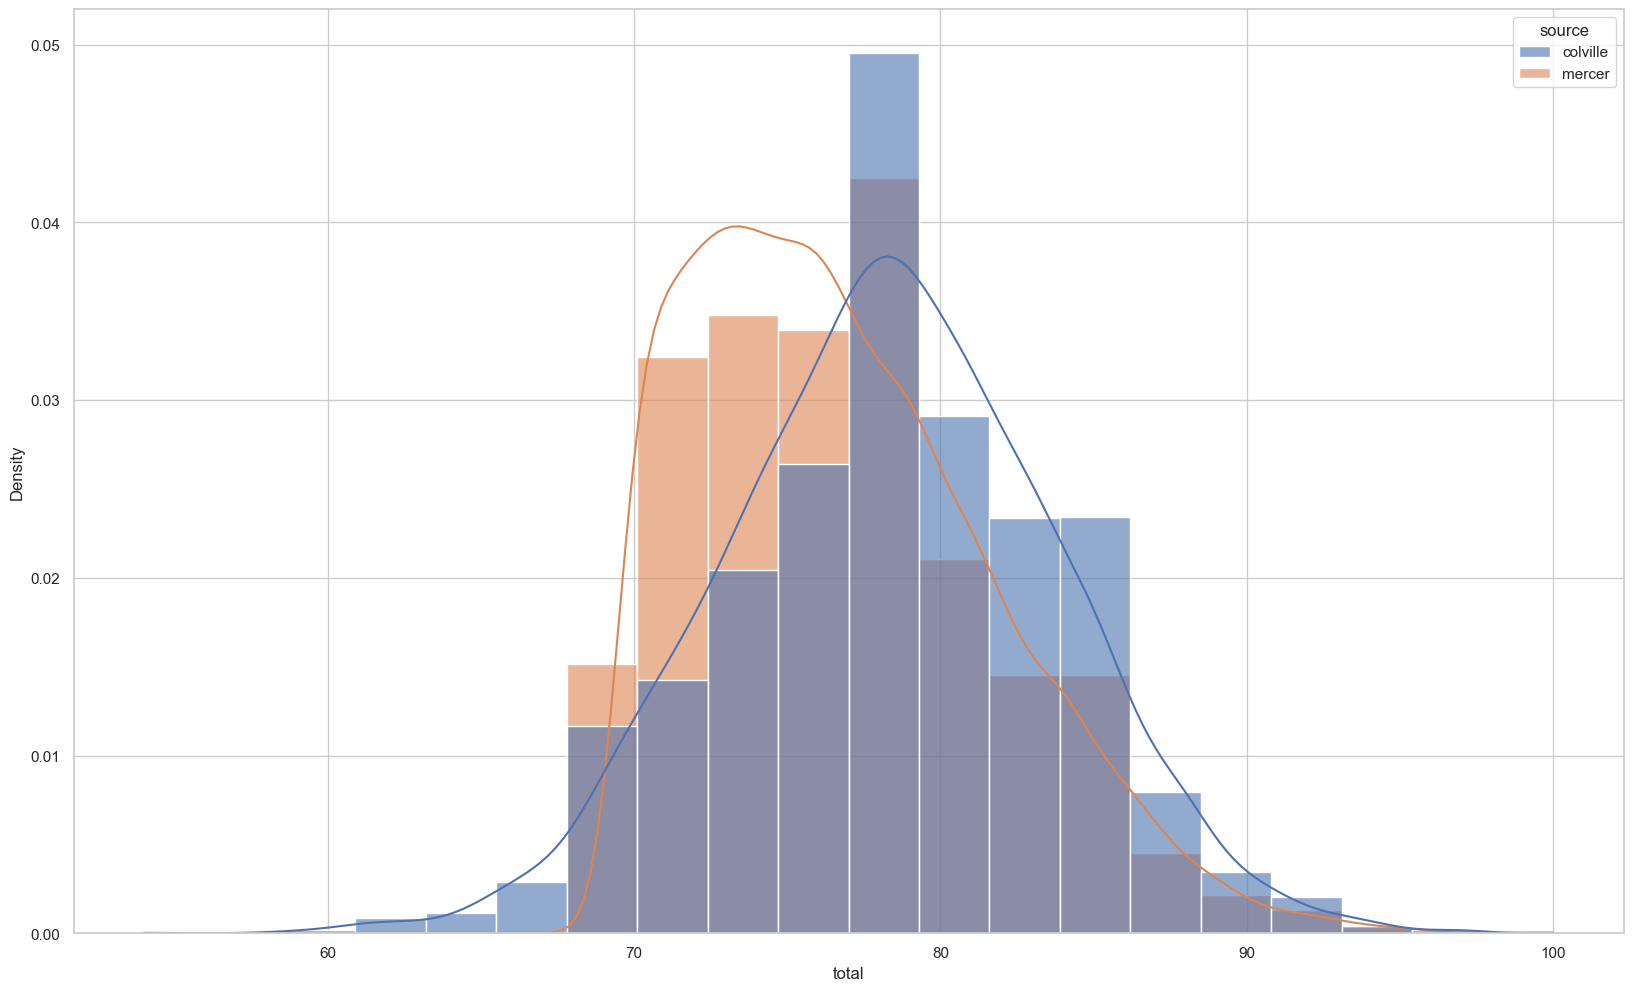

t-test: t-statistic = 21.4348, p-value = 0.0

There is a statistically significant difference between Colville and Mercer stat generation methods.


In [13]:
colville_sums = stats_df[stats_df['source'] == 'colville']['total']
mercer_sums = stats_df[stats_df['source'] == 'mercer']['total']

plt.figure(figsize=(20, 12))
sns.histplot(data=stats_df, x='total', hue='source', bins = 20, kde=True, stat='density', alpha=0.6)
plt.show()


#-test

t_stat, p_value = stats.ttest_ind(colville_sums, mercer_sums)
print(f"t-test: t-statistic = {t_stat.round(4)}, p-value = {p_value.round(4)}")
print()

if p_value < 0.05:
    print("There is a statistically significant difference between Colville and Mercer stat generation methods.")
else:
    print("There is no statistically significant difference between Colville and Mercer stat generation methods.")

# Radar Generation

In [ ]:
colville_df = stats_df.loc[stats_df['source']=='colville'].sample(1).copy()
mercer_df = stats_df.loc[stats_df['source']=='mercer'].sample(1).copy()

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Data for the first radar chart
theta_1 = colville_df.columns.tolist()  # This will be your 'theta'
values_1 = colville_df.iloc[0].tolist()  # This will be your 'r'

# Create the first radar chart
fig.add_trace(
    px.line_polar(r=values_1, theta=theta_1, line_close=True, 
                   hover_name=theta_1, 
                   hover_data={'r': values_1}).data[0],
    row=1, col=1
)

# Set the layout for the first radar chart
fig.update_traces(fill='toself', row=1, col=1)
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 20],
            tickvals=[0, 5, 10, 15, 20]
        )
    )
)

# Data for the second radar chart
theta_2 = mercer_df.columns.tolist()  # This will be your 'theta'
values_2 = mercer_df.iloc[0].tolist()  # This will be your 'r'
# values_2.append(values_2[0])  # Close the loop
# theta_2.append(theta_2[0])  # Close the loop

# Create the second radar chart
fig.add_trace(
    px.line_polar(r=values_2, theta=theta_2, line_close=True, 
                   hover_name=theta_2, 
                   hover_data={'r': values_2}).data[0],
    row=1, col=2
)

# Set the layout for the second radar chart
fig.update_traces(fill='toself', row=1, col=2)
fig.update_layout(
    polar2=dict(
        radialaxis=dict(
            range=[0, 20],
            tickvals=[0, 5, 10, 15, 20]
        )
    ),
    title_text='DnD Stats'  # Title for the second radar chart
    
)

fig.add_annotation(
    text="Colville", 
    x=0.2,  # X position for the annotation
    y=1.1,  # Y position for the annotation
    showarrow=False,
    font=dict(size=16)
)

fig.add_annotation(
    text="Mercer Chart", 
    x=0.815,  # X position for the annotation
    y=1.1,  # Y position for the annotation
    showarrow=False,
    font=dict(size=16)
)

fig.update_layout(
    width=1500,  # Set the width of the entire figure
    height=600,  # Set the height of the entire figure
)

# Show the plot
fig.show()